In [44]:
import numpy as np
from collections import deque
import re
from tqdm import tqdm

In [61]:
input = """broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a"""

In [30]:
input = """broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output"""

In [87]:
input = """%cf -> tz
%kr -> xn, gq
%cp -> sq, bd
broadcaster -> vn, sj, tg, kn
%hc -> pm
%fd -> xn, mj
%qz -> xf
%vf -> mc, pm
%zm -> rz, pm
%cn -> bd, qz
%jj -> bp
%ks -> ff
%nb -> xn, ks
%bm -> pm, vf
&xn -> kc, jb, cb, tg, ks, tx
%lm -> rk
%dn -> bd, cn
%ft -> dn
%pn -> pm, ll
%rk -> bp, fs
%tz -> bp, gp
%mc -> jx
%fs -> kx
%jf -> bd, fm
%rz -> hc, pm
%tg -> cb, xn
&hf -> rx
%vp -> pn
&pm -> ll, mc, sj, vd, vp
%rn -> kc, xn
%vn -> bd, cp
&nd -> hf
%fm -> bd, gc
%ff -> xn, fd
&bp -> cf, fh, pc, kn, fs, gn, lm
&pc -> hf
%mj -> xn
%qg -> bd
%fh -> lm
%kc -> nb
%xf -> bd, jf
%gc -> qg, bd
&bd -> vn, sq, qz, ft, nd
%jb -> kr
%gp -> bp, rp
%gq -> xn, rn
%sj -> pm, bm
%rp -> bp, jj
%sq -> ft
%cb -> jb
&vd -> hf
%gn -> cf
%kx -> gn, bp
%ll -> zm
&tx -> hf
%jx -> md, pm
%md -> pm, vp
%kn -> fh, bp"""

In [88]:
from dataclasses import dataclass


@dataclass
class Signal:
    source: str
    node: str
    input: int
    state: bool

class Node:
    def __init__(self, name):
        self.name = name
        self.inputs = []
        self.outputs = []
    
class Broadcaster(Node):
    def __init__(self, name):
        super().__init__(name)

    def handle_signal(self, signal: Signal):
        for output in self.outputs:
            yield Signal(self.name, output[0], output[1], signal.state)
            
class FlipFlop(Node):
    def __init__(self, name):
        super().__init__(name)
        self.state = True
        
    def handle_signal(self, signal: Signal):
        if signal.state:
            self.state = not self.state
            for output in self.outputs:
                yield Signal(self.name, output[0], output[1], self.state)
                
class Conjugation(Node):
    def __init__(self, name):
        super().__init__(name)
        
    def handle_signal(self, signal: Signal):
        self.inputs[signal.input] = signal.state
        sig = not any(self.inputs)
        for output in self.outputs:
            yield Signal(self.name, output[0], output[1], sig)

In [73]:
lines = input.split("\n")
nodes = {}
for line in lines:
    name = line.split(' ')[0]
    if name[0] == '%':
        nodes[name[1:]] = FlipFlop(name[1:])
    elif name[0] == '&':
        nodes[name[1:]] = Conjugation(name[1:])
    elif name == 'broadcaster':
        nodes[name] = Broadcaster(name)

for line in lines:
    (source, targets) = line.split(' -> ')
    if source[0] in ['%', '&']:
        source = source[1:]
    
    for target in targets.split(', '):
        if target in nodes:
            idx = len(nodes[target].inputs)
            nodes[target].inputs.append(True)
        else:
            idx = 0
        nodes[source].outputs.append((target, idx))

In [74]:
count = {
    True: 0,
    False: 0
}

q = deque()

for i in tqdm(range(1000)):
    q.append(Signal('button', 'broadcaster', 0, True))
    while len(q):
        sig: Signal = q.popleft()
        count[sig.state] += 1
        
        # if i<1:
        #     print(f"{sig.source} -{'low' if sig.state else 'high'}-> {sig.node}")
        
        if sig.node in nodes:
            for new_sig in nodes[sig.node].handle_signal(sig):
                q.append(new_sig)
        if sig.node == 'rx' and sig.state == True:
            print(i)
            i=10000000
            break
    

100%|██████████| 1000/1000 [00:00<00:00, 8825.90it/s]


In [75]:
count

{True: 17730, False: 45520}

In [76]:
np.prod(list(count.values()))

807069600

## Part 2

In [89]:
import networkx as nx

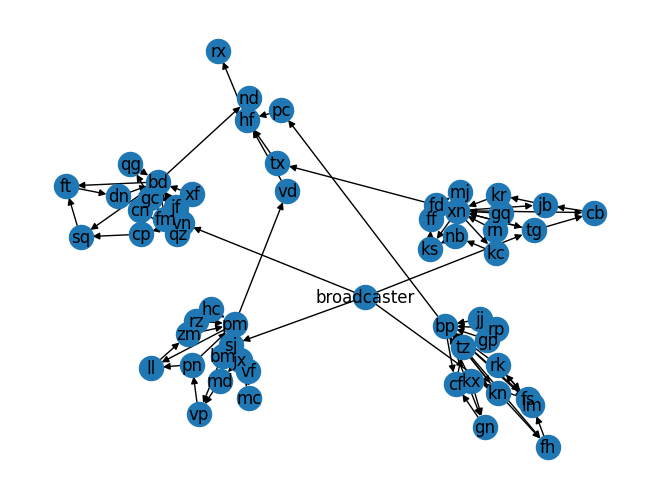

In [90]:
g = nx.DiGraph([edge for node in nodes.values() for edge in [(node.name, output[0]) for output in node.outputs]])
# g.nodes =   
# g.edges = [*[(node, node[])] for node in nodes.values()]
nx.draw(g, with_labels=True)

In [91]:
lines = input.split("\n")
nodes = {}
for line in lines:
    name = line.split(' ')[0]
    if name[0] == '%':
        nodes[name[1:]] = FlipFlop(name[1:])
    elif name[0] == '&':
        nodes[name[1:]] = Conjugation(name[1:])
    elif name == 'broadcaster':
        nodes[name] = Broadcaster(name)

for line in lines:
    (source, targets) = line.split(' -> ')
    if source[0] in ['%', '&']:
        source = source[1:]
    
    for target in targets.split(', '):
        if target in nodes:
            idx = len(nodes[target].inputs)
            nodes[target].inputs.append(True)
        else:
            idx = 0
        nodes[source].outputs.append((target, idx))

In [92]:
key_nodes = ['pc', 'tx', 'vd', 'nd']
res = {
    k: []
    for k in key_nodes
}

q = deque()

for i in tqdm(range(100000)):
    q.append(Signal('button', 'broadcaster', 0, True))
    while len(q):
        sig: Signal = q.popleft()
        count[sig.state] += 1
        
        # if i<1:
        #     print(f"{sig.source} -{'low' if sig.state else 'high'}-> {sig.node}")
        
        if sig.node in nodes:
            for new_sig in nodes[sig.node].handle_signal(sig):
                q.append(new_sig)
        if sig.node in key_nodes and sig.state == True:
            print(f"{sig.node}: {i}")
            res[sig.node].append(i)
    

  6%|▌         | 5707/100000 [00:00<00:09, 9471.14it/s]

vd: 3766
tx: 3768
pc: 3880
nd: 4018


  9%|▉         | 8814/100000 [00:00<00:09, 9883.95it/s]

vd: 7533
tx: 7537
pc: 7761
nd: 8037


 13%|█▎        | 13137/100000 [00:01<00:08, 10593.59it/s]

vd: 11300
tx: 11306
pc: 11642
nd: 12056


 16%|█▋        | 16332/100000 [00:01<00:08, 10332.32it/s]

vd: 15067
tx: 15075
pc: 15523
nd: 16075


 21%|██        | 20938/100000 [00:02<00:06, 11344.80it/s]

vd: 18834
tx: 18844
pc: 19404
nd: 20094


 24%|██▍       | 24278/100000 [00:02<00:07, 10548.94it/s]

vd: 22601
tx: 22613
pc: 23285
nd: 24113


 28%|██▊       | 27756/100000 [00:02<00:06, 11109.23it/s]

vd: 26368
tx: 26382
pc: 27166
nd: 28132


 32%|███▏      | 32442/100000 [00:03<00:06, 11178.31it/s]

vd: 30135
tx: 30151
pc: 31047
nd: 32151


 36%|███▌      | 35802/100000 [00:03<00:06, 10230.70it/s]

vd: 33902
tx: 33920
pc: 34928


 38%|███▊      | 37858/100000 [00:03<00:06, 9836.78it/s] 

nd: 36170
vd: 37669
tx: 37689


 40%|████      | 40025/100000 [00:03<00:05, 10288.94it/s]

pc: 38809
nd: 40189


 42%|████▏     | 42323/100000 [00:04<00:05, 9872.67it/s] 

vd: 41436
tx: 41458
pc: 42690


 45%|████▌     | 45367/100000 [00:04<00:05, 9749.35it/s]

nd: 44208
vd: 45203
tx: 45227


 48%|████▊     | 47559/100000 [00:04<00:05, 10103.14it/s]

pc: 46571
nd: 48227


 51%|█████     | 50652/100000 [00:04<00:05, 9652.96it/s] 

vd: 48970
tx: 48996
pc: 50452


 54%|█████▍    | 53928/100000 [00:05<00:04, 10103.40it/s]

nd: 52246
vd: 52737
tx: 52765
pc: 54333


 58%|█████▊    | 57980/100000 [00:05<00:04, 9851.41it/s] 

nd: 56265
vd: 56504
tx: 56534
pc: 58214


 62%|██████▏   | 62214/100000 [00:06<00:03, 10006.02it/s]

vd: 60271
nd: 60284
tx: 60303
pc: 62095


 65%|██████▌   | 65262/100000 [00:06<00:03, 9987.21it/s] 

vd: 64038
tx: 64072
nd: 64303
pc: 65976


 70%|██████▉   | 69606/100000 [00:06<00:02, 10379.43it/s]

vd: 67805
tx: 67841
nd: 68322
pc: 69857


 73%|███████▎  | 72581/100000 [00:07<00:03, 8900.66it/s] 

vd: 71572
tx: 71610
nd: 72341


 76%|███████▌  | 75738/100000 [00:07<00:02, 9938.92it/s]

pc: 73738
vd: 75339
tx: 75379


 78%|███████▊  | 77853/100000 [00:07<00:02, 9632.40it/s] 

nd: 76360
pc: 77619


 81%|████████  | 80942/100000 [00:08<00:01, 10098.76it/s]

vd: 79106
tx: 79148
nd: 80379
pc: 81500


 84%|████████▍ | 84097/100000 [00:08<00:01, 9740.52it/s] 

vd: 82873
tx: 82917
nd: 84398


 87%|████████▋ | 87231/100000 [00:08<00:01, 9975.64it/s]

pc: 85381
vd: 86640
tx: 86686


 89%|████████▉ | 89424/100000 [00:08<00:01, 9856.00it/s] 

nd: 88417
pc: 89262


 91%|█████████▏| 91406/100000 [00:09<00:00, 9352.34it/s]

vd: 90407
tx: 90455


 95%|█████████▍| 94697/100000 [00:09<00:00, 10414.14it/s]

nd: 92436
pc: 93143
vd: 94174
tx: 94224


 98%|█████████▊| 97949/100000 [00:09<00:00, 9852.31it/s] 

nd: 96455
pc: 97024
vd: 97941
tx: 97993


100%|██████████| 100000/100000 [00:09<00:00, 10059.48it/s]


In [93]:
diff = {
    k: np.array(val) - np.array([0] + val[:-1])
    for k, val in res.items()
}
diff

{'pc': array([3880, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881,
        3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3881,
        3881, 3881, 3881]),
 'tx': array([3768, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769,
        3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769,
        3769, 3769, 3769, 3769]),
 'vd': array([3766, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767,
        3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767,
        3767, 3767, 3767, 3767]),
 'nd': array([4018, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019,
        4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019, 4019,
        4019, 4019])}

In [94]:
np.prod([ar[1] for ar in diff.values()], dtype=np.int64)

221453937522197

221453937521197 is too low
221453937521297 is too low